# Heston Model

#### One flaw of the Black-Scholes model is that it assumes constant volatility. To fix this, the Heston model was derived to solve for this issue.

$ dS_t = r S_t dt + \sqrt{V_t} S_t dW_{1t} $

$ dV_t = k (\theta - V_t) dt + \sigma \sqrt{V_t} dW_{2t} $

where:

$ S_t = $ asset price at time $t$

$ r = $ risk-free interest rate

$ \sqrt{V_t} = $ volatility (standard deviation) of the asset price

$ \sigma = $ volatility of the vol ($ \sqrt{V_t} $)

$ \theta = $ long-term price variance

$ k = $ rate of reversion to $ \theta $

$ dt = $ time increment

$ dW_{1t} = $ Brownian motion of the asset price

$ dW_{2t} = $ Brownian motion of the variance

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from py_vollib_vectorized import vectorized_implied_volatility as implied_vol

In [36]:
S0 = 100.0
T = 1.0 
r = 0.02
N = 252           # number of timesteps     
M = 100          # number of simulations

kappa = 3            # rate of mean reversion
theta = 0.20**2      # long-term mean of variance
v0 = 0.25**2         # initial variance under risk-neutral dynamics
rho = 0.7            # correlation between returns and variances under risk-neutral dynamics
sigma = 0.6          # vol of vol

theta, v0

(0.04000000000000001, 0.0625)

In [37]:
def heston_model_sim(S0, v0, rho, kappa, theta, sigma,T, N, M):
    # initialize other parameters
    dt = T/N
    mu = np.array([0,0])
    cov = np.array([[1,rho], [rho,1]])

    # array sfor storing prices and variances
    S = np.full(shape = (N+1, M), fill_value = S0)
    v = np.full(shape = (N+1, M), fill_value = v0)

    # sampling correlated brownian motions
    Z = np.random.multivariate_normal(mu, cov, (N,M))

    for i in range(1, N+1):
        S[i] = S[i-1] * np.exp((r-0.5*v[i-1])*dt + np.sqrt(v[i-1]*dt) * Z[i-1, :, 0])
        v[i] = np.maximum(v[i-1] + kappa * (theta-v[i-1])*dt + sigma * np.sqrt(v[i-1]*dt) * Z[i-1,:,1], 0)
    return S, v

In [38]:
rho_p = 0.98
rho_n = -0.98
S_p,v_p = heston_model_sim(S0, v0, rho_p, kappa, theta, sigma,T, N, M)
S_n,v_n = heston_model_sim(S0, v0, rho_n, kappa, theta, sigma,T, N, M)

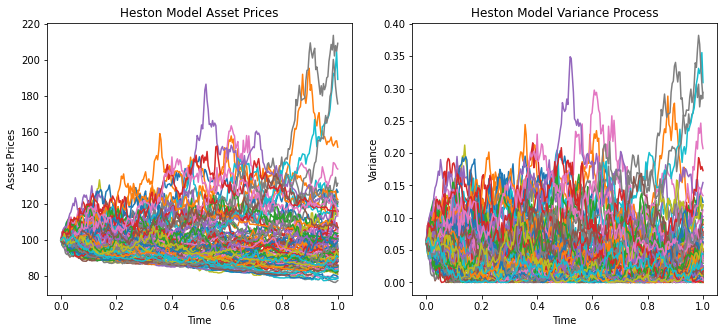

In [39]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(12,5))
time = np.linspace(0,T,N+1)
ax1.plot(time,S_p)
ax1.set_title('Heston Model Asset Prices')
ax1.set_xlabel('Time')
ax1.set_ylabel('Asset Prices')
ax2.plot(time,v_p)
ax2.set_title('Heston Model Variance Process')
ax2.set_xlabel('Time')
ax2.set_ylabel('Variance')
plt.show()